# Ch04 Apriori 알고리즘

2016930025   
공간정보공학과   
최석규   

## 연관분석

펜을 사는 사람들은 노트도 필요할 것이니 노트와 펜을 같은 공간에 배치해 소비를 늘리는 것은 옳은 전략일까? 그렇다면 커피는 어떤 상품들과 함께 놓을 때 소비가 높아질까? 이러한 상품간의 연관성을 데이터를 통해 분석하는 과정을 `연관분석`이라 한다. 연관분석은 연관규칙을 발견하는 과정이다. '샴푸를 구매한 고객중 20%는 린스도 같이 구매한다'정도가 일종의 연관 규칙이 될 수 있다.


### 용어 정리

상품 집합 T와 T의 서로 다른 부분집합 X와 Y에 대해서   
*T = { i<sub>1</sub>, i<sub>2</sub>, i<sub>3</sub>, ..., i<sub>n</sub>}*  
*X ⊂ T, X ⊂ T*   
*X ∩ Y = ∅*   

`지지도(support)`: 전체 거래중 해당 거래가 일어날 확률.  
*Supp(X)* = (X상품을 포함한 거래 수) / (전체 상품 거래 수)  
X와 Y상품 집합을 호함하는 거래에 대한 지지도: *Supp(X ∪ Y)*  
*Supp(X ∪ Y)* = (X상품과 Y상품을 모두 포함한 거래 수) / (전체 상품 거래 수)


`신뢰도(confidence)`: 조건 거래량중 해당 거래가 일어날 확률(조건부확률)  
*Conf(X => Y) = Supp(X ∪ Y) / Supp(X)*  


`향상도(lift)`: Y의 구매확률과 X가 구매될때 Y의 구매확률의 비율로 계산되는 연관성 지표로 1을 기준으로 1보다 크면 양의 상관, 작으면 음의 상관, 같으면 독립을 의미한다.    
*Lift(X => Y) = conf(X => Y) / Supp(Y)
= Supp(X ∪ Y) / (Supp(X) Supp(Y))*

<br/>

⚠️ X와 Y는 사건이 아닌 상품 집합이고, *X ∩ Y = ∅* 이므로 X와 Y상품 집합을 호함하는 거래에 대한 지지도는 *Supp(X ∩ Y)*이 아닌 *Supp(X ∪ Y)*이다.

## Aprioi 알고리즘

연관성은 두 개 이상의 상품 사이에서 나타난다. n개의 상품으로 구성된 집합 *T*의 멱집합은 n<sup>2</sup>개의 원소로 구성된다. 이때, 공집합과 연관성을 가질 수 없는 원소의 개수가 1개인 단일 상품집합을 제외하면 연관성을 가질 수 있는 집합은 n<sup>2</sup> - (n+1)개다. 따라서 연관성을 가질 수 있는 모든 부분집합에 대해 연관성을 계산한다면 이는 최소 O(n<sup>2</sup>)의 수행시간을 갖는 알고리즘이 될것이다. 

`Apriori 알고리즘`은 모든 가능성에 대해 계산하지 않고 연관성이 나타날 수 있는 빈발항목 집합을 찾는 효율적인 방법을 제공한다.

알고리즘의 대략적 수도코드는 다음과 같다.   
`T`: 전체집합(Total set)  
`C`: 후보집합(candidate set)   
`L`: 빈발집합(large item set) 리스트
```python
k = 0
L[k] = T
while L[k] is not empth
  k++
  C = get_subset_with_size(L[k-1], k)
  for c in C
    if Supp(c) >= min_support
      L[k].add(c)

result = []
for c in L[k-1]
  for item in c
    if Conf(item, c) >= min_confidence
      if Lift(item, c) >= 1
        result.add({
          "antecedent": item,
          "consequent": c,
          "lift": Lift(item, c)
        })
  
```

## 파이썬 기반 분석(기본 예제)

### 패키지 설정

`apriori`: apriori 알고리즘 모듈  
`association_rules`: 연관분석 모듈  
[`TransactionEncoder`](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/): 리스트 -> 빈발항목집합(frequent itemset) 변환 모듈  
`pandas`: 데이터 프레임 패키지  
`matplotlib.pyplot`: 데이터 시각화 패키지 

In [ ]:
# Apriori 알고리즘
from mlxtend.frequent_patterns import apriori, association_rules
# 연관분석용 데이터 변환
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

### 원데이터 분석

In [ ]:
# 구매 기록 데이터
tran=[['A', 'B', 'C', 'D', 'E'],
      ['B', 'C'],
      ['A', 'B', 'F'],
      ['A', 'B', 'G'],
      ['A', 'F', 'H'],
]

In [ ]:
# 데이터를 연관분석이 가능한 거래유무 행렬로 변환 
te = TransactionEncoder()
tran_ar = te.fit(tran).transform(tran)
print(tran_ar) # 각 셀의 T/F 는 거래 유무를 나타낸다.
# 열이름
print(te.columns_)

[[ True  True  True  True  True False False False]
 [False  True  True False False False False False]
 [ True  True False False False  True False False]
 [ True  True False False False False  True False]
 [ True False False False False  True False  True]]
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


In [ ]:
# 열이름과 거래유무 행렬 데이터을 프레임으로 변환
df = pd.DataFrame(tran_ar, columns=te.columns_)
print(df)

       A      B      C      D      E      F      G      H
0   True   True   True   True   True  False  False  False
1  False   True   True  False  False  False  False  False
2   True   True  False  False  False   True  False  False
3   True   True  False  False  False  False   True  False
4   True  False  False  False  False   True  False   True


In [ ]:
# 각 상품별 거래빈도
freq = df.sum().to_frame('Frequency')
# 빈도 내림차순으로 정렬
freq_sort = freq.sort_values('Frequency', ascending=False)
print(freq_sort)

   Frequency
A          4
B          4
C          2
F          2
D          1
E          1
G          1
H          1


In [ ]:
# 지지도(Support) 계산
freq_sort['Support'] = freq_sort['Frequency'] / len(tran)
print(freq_sort)

   Frequency  Support
A          4      0.8
B          4      0.8
C          2      0.4
F          2      0.4
D          1      0.2
E          1      0.2
G          1      0.2
H          1      0.2


<Axes: title={'center': 'Frequent Items'}>

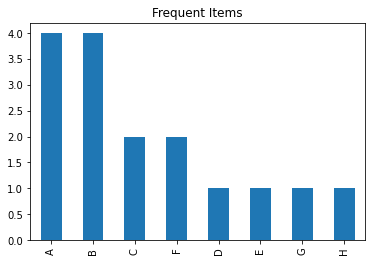

In [ ]:
#상품 아이템별 거래빈도 그래프
freq_sort['Frequency'].plot(kind='bar', title='Frequent Items')

<Axes: >

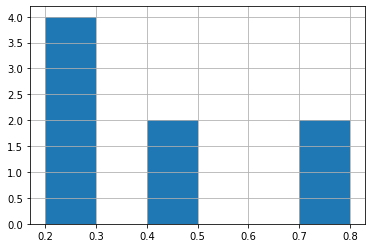

In [ ]:
# 상품 아이템 지지도 히스토그램
freq_sort['Support'].hist(bins=6)

### 연관규칙 생성

In [ ]:
# 최소 지지도 0.4로 설정할 경우
min_support = 0.4
# 빈발항목과 지지도
freq_items = apriori(df, min_support=min_support, use_colnames=True)
print(freq_items)

   support itemsets
0      0.8      (A)
1      0.8      (B)
2      0.4      (C)
3      0.4      (F)
4      0.6   (A, B)
5      0.4   (F, A)
6      0.4   (C, B)


In [ ]:
# 최소 신뢰도(confidence)를 0.7로 설정할 경우
min_confidence = 0.7
# 연관 규칙
rules = association_rules(freq_items, metric='confidence', min_threshold=min_confidence)
print(rules)

  antecedents consequents  antecedent support  consequent support  support  \
0         (A)         (B)                 0.8                 0.8      0.6   
1         (B)         (A)                 0.8                 0.8      0.6   
2         (F)         (A)                 0.4                 0.8      0.4   
3         (C)         (B)                 0.4                 0.8      0.4   

   confidence    lift  leverage  conviction  
0        0.75  0.9375     -0.04         0.8  
1        0.75  0.9375     -0.04         0.8  
2        1.00  1.2500      0.08         inf  
3        1.00  1.2500      0.08         inf  


#### 연관규칙 결과

위 결과를 보면 4개의 연관 규칙이 만들어졌다. 각열은 `조건절 항목(antecedents)`, `종속절 항목(consequents)`, `조건절 지지도(antecedent support)`, `종속절 지지도(consequent support)`, `신뢰도(suppor)`, `향상도(left)`, `레버러지(leverage)`, `확신도(conviction)`을 의미한다.


`레버러지(reverage)`는 리프트의 (분자) - (분모)값이다. 리프트가 1 보다 크다면 레버러지는 양수이고 1보다 작다면 음수이다.  
Reverage = *Supp(X ∩ Y) - Supp(X) Supp(Y)*


`확신도(conviction)`는 1이면 독립, 1보다 작으면 X를 구매 시 Y를 구매하지 않는 거래 수가 전체 거래에서 Y를 구매하지 않는거래의 수보다 큼을 의미한다.   
Conviction = *(1 - Supp(Y)) / (1 - conf(X => Y))*

In [ ]:
# 리프트가 1보다 큰 양의 상관관계를 만족하는 연관 규칙 추출
rules = rules[rules['lift'] > 1]
# 신뢰도의 내림차순으로 정렬
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(F),(A),0.4,0.8,0.4,1.0,1.25,0.08,inf
3,(C),(B),0.4,0.8,0.4,1.0,1.25,0.08,inf


### 결과 분석

위 결과를 분석해보자.
1. 조건2(F -> A)  
lift가 1보다 크므로 F를 구매하면 A를 구매하는 경향이 있다. confidence가 1이므로 F를 구매할 경우 100% A를 구매했다.
2. 조건3(C -> B)  
lift가 1보다 크므로 C를 구매하면 B를 구매하는 경향이 있다. confidence가 1이므로 C를 구매할 경우 100% B를 구매했다.

In [ ]:
# 원데이터로 결과 확인
# F를 구매한경우 100% A를 구매했다.
# F를 구매한 경우 출력
print(list(filter(lambda items: 'F' in items, tran)))

# C를 구매한경우 100% B를 구매했다.
# C를 구매한 경우 출력
print(list(filter(lambda items: 'C' in items, tran)))

[['A', 'B', 'F'], ['A', 'F', 'H']]
[['A', 'B', 'C', 'D', 'E'], ['B', 'C']]


## 응용 예제

UCI에서 제공하는 [Online Retail](https://archive.ics.uci.edu/ml/datasets/Online+Retail) 데이터를 활용해 연관분석을 진행해보자.  


### 패키지 설정

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt

### 원데이터 분석

#### 데이터 가공
1. 데이터 불러오기
2. 거래량있는 데이터만 남기기
3. 거래별(`invoiceNo`), 상품명별(`Description`)로 그루핑, 합계 구하기
4. 거래와 상품명을 각각 행, 열로 재구조화 한다. 셀의 값은 거래 유무(1/0)로 한다.

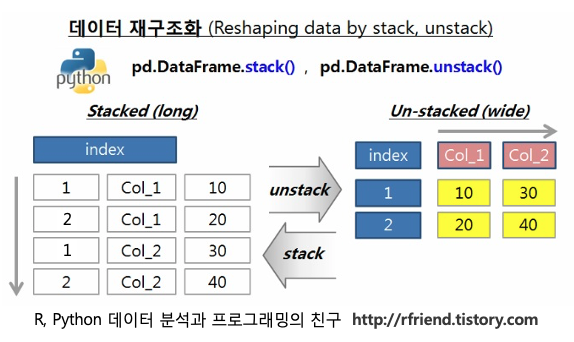

In [ ]:
# 데이터 파일 링크 주소
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
# 데이터 파일 읽기
df = pd.read_excel(data_url)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
print(f'before: {df.shape[0]}')

# 구매량이 0보다 큰 거래량 추출
df = df[df.Quantity > 0]
df.head()
print(f'before: {df.shape[0]}')

before: 541909
before: 531285


In [ ]:
# 거래별 상품별 수량 합계
df = df.groupby(['InvoiceNo','Description'])['Quantity'].sum()
print(df)

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          8
           GLASS STAR FROSTED T-LIGHT HOLDER       6
           KNITTED UNION FLAG HOT WATER BOTTLE     6
           RED WOOLLY HOTTIE WHITE HEART.          6
           SET 7 BABUSHKA NESTING BOXES            2
                                                  ..
581587     PLASTERS IN TIN STRONGMAN              12
           SPACEBOY LUNCH BOX                     12
A563185    Adjust bad debt                         1
A563186    Adjust bad debt                         1
A563187    Adjust bad debt                         1
Name: Quantity, Length: 519974, dtype: int64


In [ ]:
# 데이터 프레임 재구조화(unstack)
df = df.unstack()
print(df)

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                  NaN                             NaN   
536366                                  NaN                             NaN   
536367                                  NaN                             NaN   
536368                                  NaN                             NaN   
536369                                  NaN                             NaN   
...                                     ...                             ...   
581586                                  NaN                             NaN   
581587                                  NaN                             NaN   
A563185                                 NaN                             NaN   
A563186                                 NaN                             NaN   
A563187                                 NaN         

In [ ]:
# 구매여부 1/0 값으로 변경
df = df.applymap(lambda x: int(x>0))
print(df)

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   
...                                     ...                             ...   
581586                                    0                               0   
581587                                    0                               0   
A563185                                   0                               0   
A563186                                   0                               0   
A563187                                   0         

In [ ]:
# 아이템별 빈도 및 항목명 설정(Frequency)
freq = df.sum(axis=0).to_frame('Frequency')
# 빈도수 내림차순 정렬
freq_sort = freq.sort_values('Frequency', ascending=False)
print(freq_sort)

                                     Frequency
Description                                   
WHITE HANGING HEART T-LIGHT HOLDER        2260
JUMBO BAG RED RETROSPOT                   2092
REGENCY CAKESTAND 3 TIER                  1989
PARTY BUNTING                             1686
LUNCH BAG RED RETROSPOT                   1564
...                                        ...
DOORKNOB CERAMIC IVORY                       1
SET/4 2 TONE EGG SHAPE MIXING BOWLS          1
DUSTY PINK CHRISTMAS TREE 30CM               1
Dotcomgiftshop Gift Voucher £100.00          1
wrongly sold (22719) barcode                 1

[4077 rows x 1 columns]


#### 최소지지도 설정

상품별 지지도를 계산하고 히스토그램으로 시각화해 분포 파악 후 최소 지지도 설정

In [ ]:
# 단일 아이템의 지지도
freq_sort['Support'] = freq_sort['Frequency'] / len(freq_sort)
print(freq_sort)

                                     Frequency   Support
Description                                             
WHITE HANGING HEART T-LIGHT HOLDER        2260  0.554329
JUMBO BAG RED RETROSPOT                   2092  0.513122
REGENCY CAKESTAND 3 TIER                  1989  0.487859
PARTY BUNTING                             1686  0.413539
LUNCH BAG RED RETROSPOT                   1564  0.383615
...                                        ...       ...
DOORKNOB CERAMIC IVORY                       1  0.000245
SET/4 2 TONE EGG SHAPE MIXING BOWLS          1  0.000245
DUSTY PINK CHRISTMAS TREE 30CM               1  0.000245
Dotcomgiftshop Gift Voucher £100.00          1  0.000245
wrongly sold (22719) barcode                 1  0.000245

[4077 rows x 2 columns]


<Axes: >

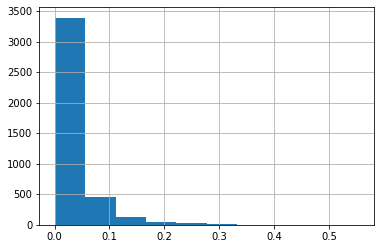

In [ ]:
# 단일 아이템 지지도 분포 시각화
freq_sort['Support'].hist()

### 연관규칙 생성

위 히스토그램을 통해 최소 지지도를 0.01로 설정하자.

In [ ]:
# 최소 지지도 설정 및 연관규칙 생성
min_support = 0.01
freq_items = apriori(df, min_support=min_support, use_colnames=True)
print(freq_items)

       support                                           itemsets
0     0.013359                 ( SET 2 TEA TOWELS I LOVE LONDON )
1     0.015793                           (10 COLOUR SPACEBOY PEN)
2     0.012465                  (12 MESSAGE CARDS WITH ENVELOPES)
3     0.017630                    (12 PENCIL SMALL TUBE WOODLAND)
4     0.017978              (12 PENCILS SMALL TUBE RED RETROSPOT)
...        ...                                                ...
1849  0.011025  (JUMBO STORAGE BAG SUKI, JUMBO BAG WOODLAND AN...
1850  0.011174  (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL.,...
1851  0.010280  (LUNCH BAG CARS BLUE, LUNCH BAG SUKI DESIGN , ...
1852  0.010181  (LUNCH BAG SUKI DESIGN , LUNCH BAG  BLACK SKUL...
1853  0.010131  (CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...

[1854 rows x 2 columns]


In [ ]:
# 최소 신뢰도 60%를 기준으로 연관규칙 생성
min_confidence = 0.6
rules = association_rules(freq_items, metric='confidence', min_threshold=min_confidence)
print(rules)

                                           antecedents  \
0                     (ALARM CLOCK BAKELIKE CHOCOLATE)   
1                     (ALARM CLOCK BAKELIKE CHOCOLATE)   
2                        (ALARM CLOCK BAKELIKE ORANGE)   
3                          (ALARM CLOCK BAKELIKE RED )   
4                         (ALARM CLOCK BAKELIKE GREEN)   
..                                                 ...   
493  (RED RETROSPOT CHARLOTTE BAG, CHARLOTTE BAG SU...   
494  (STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI ...   
495  (STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...   
496  (STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI ...   
497  (RED RETROSPOT CHARLOTTE BAG, CHARLOTTE BAG SU...   

                                           consequents  antecedent support  \
0                         (ALARM CLOCK BAKELIKE GREEN)            0.021255   
1                          (ALARM CLOCK BAKELIKE RED )            0.021255   
2                         (ALARM CLOCK BAKELIKE GREEN)            0.0

In [ ]:
# 리프트가 1보다 큰 양의 상관관계를 만족하는 연관규칙 추출
rules = rules[rules['lift'] > 1]
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
194,"(SUKI SHOULDER BAG, JAM MAKING SET PRINTED)",(DOTCOM POSTAGE),0.010826,0.035161,0.010379,0.958716,27.266522,0.009999,23.370547
242,"(HERB MARKER THYME, HERB MARKER PARSLEY)",(HERB MARKER ROSEMARY),0.010578,0.011919,0.010081,0.953052,79.961033,0.009955,21.046126
404,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROS...",(REGENCY TEA PLATE GREEN ),0.013359,0.018921,0.012664,0.947955,50.099816,0.012411,18.850726
243,"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",(HERB MARKER THYME),0.010677,0.011770,0.010081,0.944186,80.219959,0.009956,17.705788
56,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011770,0.011919,0.010975,0.932489,78.235865,0.010835,14.635951
...,...,...,...,...,...,...,...,...,...
254,"(JUMBO BAG APPLES, JUMBO BAG ALPHABET)",(JUMBO BAG RED RETROSPOT),0.019418,0.103894,0.011671,0.601023,5.784990,0.009653,2.246010
373,"(LUNCH BAG PINK POLKADOT, LUNCH BAG WOODLAND)",(LUNCH BAG CARS BLUE),0.019666,0.057112,0.011820,0.601010,10.523426,0.010696,2.363189
81,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE LIVINGROOM ),0.021653,0.016289,0.013012,0.600917,36.890468,0.012659,2.464930
7,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.038886,0.052195,0.023341,0.600255,11.500231,0.021312,2.371026


### 결과 분석

498개의 연관규칙이 생성되었다. 특정 항목을 조건부와 결론부에 폼함하는 규칙들을 살펴보자.

1. `REGENCY TEA PLATE PINK`를 구매한 거래중 91%에는 `REGENCY TEA PLATE GREEN`도 포함되어있다(`confidence`).  
`REGENCY TEA PLATE GREEN`는 전체 거래중 1.8%의 거래에 포함되는 것을 생각하면 굉장히 큰 영향이 있는 것을 알 수 있다. 이러한 양의 상관정도는 `lift`값 48이 표현하고 있다.

2. `REGENCY TEA PLATE GREEN`, `REGENCY TEA PLATE ROSES`등이 
`REGENCY TEA PLATE PINK`의 구매에 영향을 미쳤다. 

In [ ]:
# 1. 조건부에 'REGENCY TEA PLATE PINK'가 있는 규칙
rules[rules.antecedents.apply(lambda x:'REGENCY TEA PLATE PINK' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
90,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.015147,0.018921,0.013806,0.911475,48.171834,0.013520,11.082555
94,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE ROSES ),0.015147,0.022100,0.013359,0.881967,39.908521,0.013024,8.284988
403,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE GRE...",(REGENCY TEA PLATE ROSES ),0.013806,0.022100,0.012664,0.917266,41.505780,0.012359,11.819838
404,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROS...",(REGENCY TEA PLATE GREEN ),0.013359,0.018921,0.012664,0.947955,50.099816,0.012411,18.850726
406,(REGENCY TEA PLATE PINK),"(REGENCY TEA PLATE GREEN , REGENCY TEA PLATE R...",0.015147,0.015842,0.012664,0.836066,52.774346,0.012424,6.003362


In [ ]:
# 2. 결론부에 'REGENCY TEA PLATE PINK'가 있는 규칙
rules[rules.consequents.apply(lambda x:'REGENCY TEA PLATE PINK' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
91,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE PINK),0.018921,0.015147,0.013806,0.729659,48.171834,0.013520,3.643000
95,(REGENCY TEA PLATE ROSES ),(REGENCY TEA PLATE PINK),0.022100,0.015147,0.013359,0.604494,39.908521,0.013024,2.490111
405,"(REGENCY TEA PLATE GREEN , REGENCY TEA PLATE R...",(REGENCY TEA PLATE PINK),0.015842,0.015147,0.012664,0.799373,52.774346,0.012424,4.908877
407,(REGENCY TEA PLATE GREEN ),"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROS...",0.018921,0.013359,0.012664,0.669291,50.099816,0.012411,2.983414
